In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import time
from scipy import interpolate

In [2]:
from natal_kick_tools import mandel_muller_likelihood_functions as mmf
from natal_kick_tools import likelihood_plot_functions as lpf

In [3]:
# this is just a little function that we will use to make the plot more beautiful (bigger ticks, labels)
# However, you do not have to use this (just uncommoment "layoutAxes" everywhere)
from matplotlib.ticker import (FormatStrFormatter,
                               AutoMinorLocator)

def layoutAxes(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 18, second=False, labelpad=None, setMinor=True):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad)#, fontweight='bold')    
    
    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax


In [7]:
# Define the models of interest
bh_kicks=[200]
ns_kicks = [200, 400, 600, 700, 800]
sigmas = [0.01, 0.3, 0.7]

# Define the location of the posterior data
pulsar_data_loc = "../correctedPulsarPosteriors/correctedVtData"

# Read Velocity Data

## Model Velocities

In [6]:
# Some UGLY but functional definitions to plot specific ns_kick values
NS_200_RANGE = [0,1,2]
NS_400_RANGE = [3,4,5]
NS_600_RANGE = [6,7,8]
NS_700_RANGE = [9,10,11]
NS_800_RANGE = [12,13,14]

SIGMA_001_RANGE = [0,3,6,9,12]
SIGMA_03_RANGE = [1,4,7,10,13]
SIGMA_07_RANGE = [2,5,8,11,14]

In [8]:
# Read model velocity data
NS_KICKS_3D = []
NS_KICKS_2D = []
NS_KICK_MULT = [] 
SIGMAS = []

for ns_kick in ns_kicks:
    for sigma in sigmas:
        fname = f"model_velocities/vns_{ns_kick}_sigma_{sigma}_velocities"
        v_3d, v_2d = np.loadtxt(fname, skiprows=1, unpack=True)
        NS_KICKS_3D.append(v_3d)
        NS_KICKS_2D.append(v_2d)
        NS_KICK_MULT.append(ns_kick)
        SIGMAS.append(sigma)        

In [9]:
def plot_kde(PLOT_RANGE, d=2):
 
    for i in PLOT_RANGE:
        kde_NS_3D = gaussian_kde( NS_KICKS_3D[i] )
        kde_NS_2D = gaussian_kde( NS_KICKS_2D[i] )
        NS_dist_space = linspace( min(NS_KICKS_3D[i]), max(NS_KICKS_3D[i]), 100 )
        
        if d==2:
            plt.plot( NS_dist_space, kde_NS_2D(NS_dist_space), label=f'2D Projected Kicks (v_ns={NS_KICK_MULT[i]}, sigma={SIGMAS[i]})');
        else:
            plt.plot( NS_dist_space, kde_NS_3D(NS_dist_space), label=f'3D Model Kicks (v_ns={NS_KICK_MULT[i]}, sigma={SIGMAS[i]})');

    layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
               nameY='Kick Velocity prob dist [km/s ^-1]')

    plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

    # plt.ylim(0, 5e-3)
    plt.xlim(0, 1200)

    plt.legend(fontsize=17)

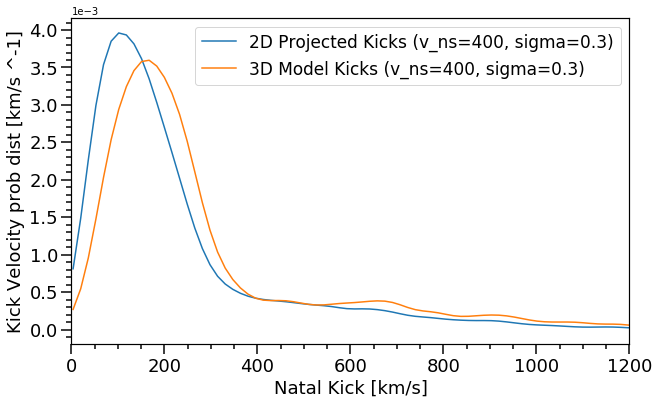

In [10]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 
plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE), d=2)
plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE), d=3)
plt.show()

# Read Likelihood Data

In [11]:
p_models = []
columns = [] # labels for plotting later
for ns_kick in ns_kicks:
    for sigma in sigmas:
        fname = f"calculatedModelLikelihoods/vns_{ns_kick}_sigma_{sigma}"
        all_likelihoods = np.loadtxt(fname)
        p_models.append(np.prod(all_likelihoods))
        
        col_name = f"vns_{ns_kick}_sigma_{sigma}"
        columns.append(col_name)
        
# normalize the array
p_models = p_models/np.sum(p_models)

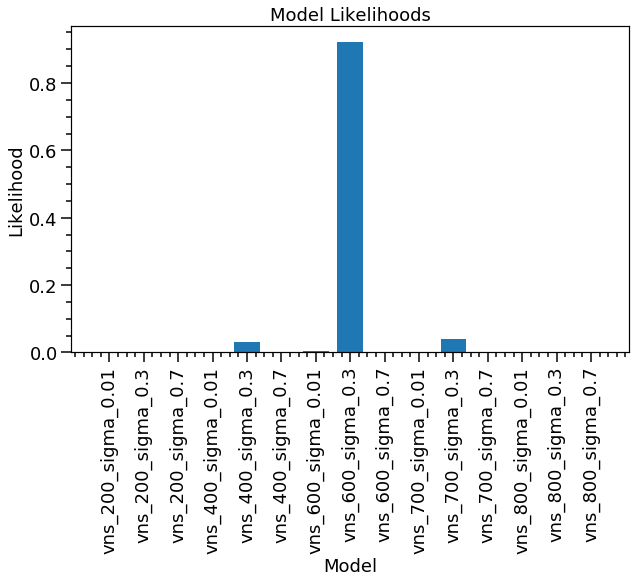

In [13]:
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 

x_range = np.linspace(0, len(p_models), len(p_models))
plt.bar(x_range, p_models, tick_label=columns)

layoutAxes(ax=ax, nameX='Model',\
           nameY='Likelihood')
plt.xticks(rotation=90)
# plt.semilogy()

plt.title("Model Likelihoods", fontsize=18)

plt.show()

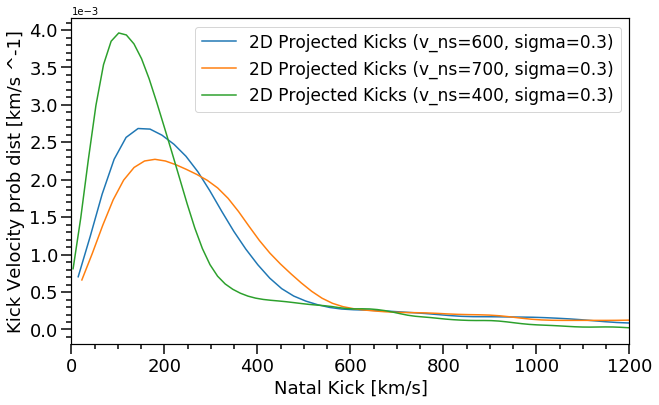

In [14]:
# The three most likely models
f, ax= plt.subplots(1, 1,  figsize=(10,6)) 
plot_kde(np.intersect1d(NS_600_RANGE, SIGMA_03_RANGE), d=2)
plot_kde(np.intersect1d(NS_700_RANGE, SIGMA_03_RANGE), d=2)
plot_kde(np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE), d=2)
plt.show()

# CDF Plots

In [15]:
# Takes about 30 s
start = time.time()

vt_all = []

for file in glob.glob('../correctedPulsarPosteriors/correctedVtData/*.bootstraps'):
    vt_all.append(np.loadtxt(file, unpack=True, usecols=5))

end = time.time()
print(end - start, "s")

27.864278078079224


In [16]:
index_600_03 = np.intersect1d(NS_600_RANGE, SIGMA_03_RANGE)[0]
index_700_03 = np.intersect1d(NS_700_RANGE, SIGMA_03_RANGE)[0]
index_400_03 = np.intersect1d(NS_400_RANGE, SIGMA_03_RANGE)[0]

In [17]:
PLOT_DATA = [vt_all, NS_KICKS_2D, NS_KICK_MULT, SIGMAS]

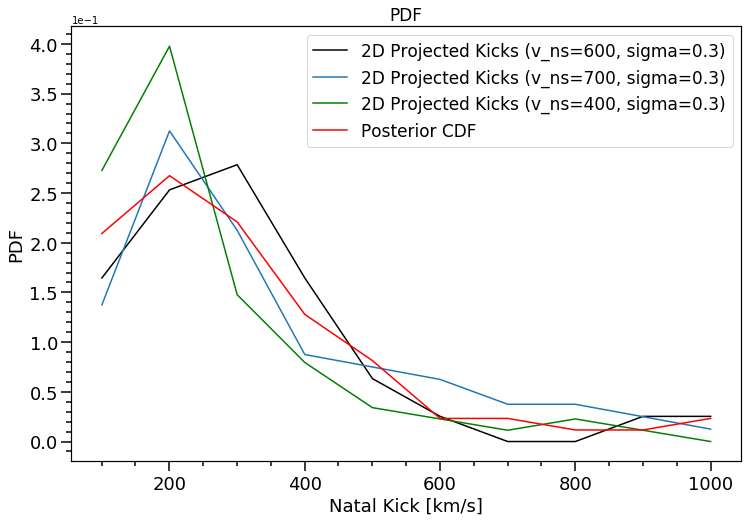

In [18]:
f, ax= plt.subplots(1, 1,  figsize=(12,8)) 

lpf.plot_model_pdf(*PLOT_DATA, index_600_03, color='k')
lpf.plot_model_pdf(*PLOT_DATA, index_700_03, color='C0')
lpf.plot_model_pdf(*PLOT_DATA, index_400_03, color='g')

lpf.plot_posterior_pdf(*PLOT_DATA, color='r')


layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='PDF')

plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

plt.title(f"PDF", fontsize=17)

leg = plt.legend(fontsize=17)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
    
# plt.semilogx()
plt.show()


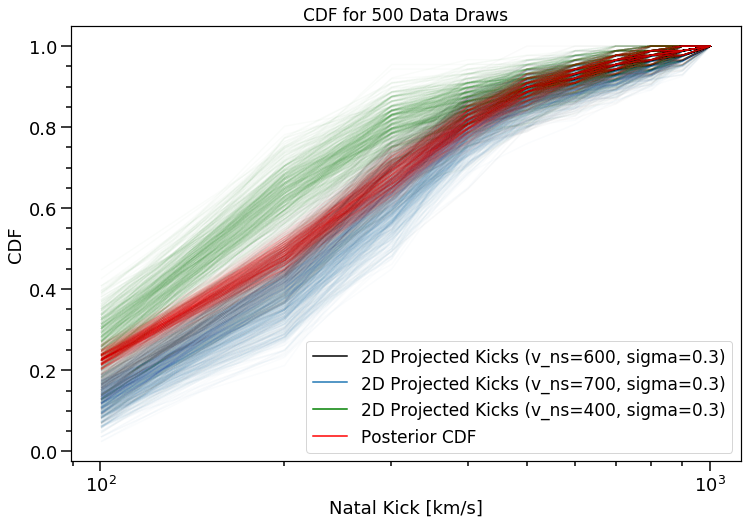

Plot completed in 25.375806 s


In [19]:
n_cdf = 500

f, ax= plt.subplots(1, 1,  figsize=(12,8)) 

start = time.time()

lpf.plot_model_cdf(*PLOT_DATA, n_cdf, index_600_03, color='k')
lpf.plot_model_cdf(*PLOT_DATA, n_cdf, index_700_03, color='C0')
lpf.plot_model_cdf(*PLOT_DATA, n_cdf, index_400_03, color='g')

lpf.plot_posterior_cdf(*PLOT_DATA, n_cdf, color='r')



layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='CDF')

plt.ticklabel_format(axis='y', style='sci',scilimits=(0,0))

plt.title(f"CDF for {n_cdf} Data Draws", fontsize=17)

leg = plt.legend(fontsize=17)
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
    
plt.semilogx()
plt.show()

end = time.time()
print(f"Plot completed in {end - start:2f} s")

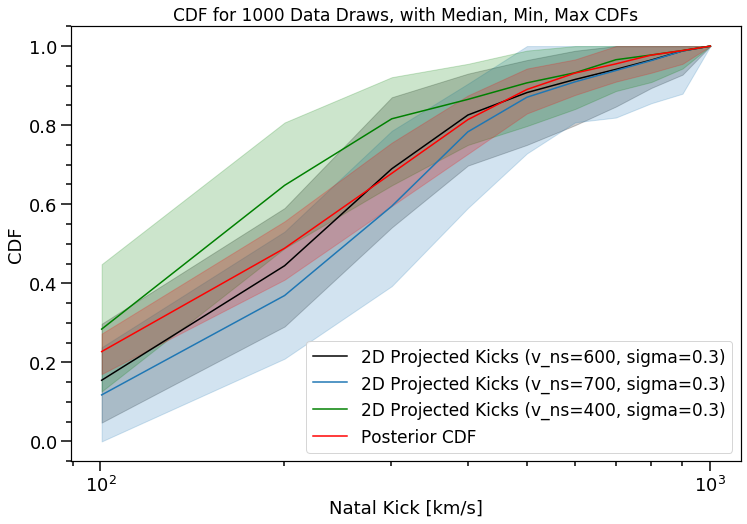

In [20]:
n_cdf = 1000
n_bins = 10

f, ax= plt.subplots(1, 1,  figsize=(12,8)) 

lpf.plot_avg_model_cdf(*PLOT_DATA, n_cdf, index_600_03, n_bins=n_bins, color='k')
lpf.plot_avg_model_cdf(*PLOT_DATA, n_cdf, index_700_03, n_bins=n_bins, color='C0')
lpf.plot_avg_model_cdf(*PLOT_DATA, n_cdf, index_400_03, n_bins=n_bins, color='g')


lpf.plot_avg_posterior_cdf(*PLOT_DATA, n_cdf, n_bins=n_bins, color='r')


layoutAxes(ax=ax, nameX='Natal Kick [km/s]',\
           nameY='CDF')


plt.title(f"CDF for {n_cdf} Data Draws, with Median, Min, Max CDFs", fontsize=17)

plt.legend(fontsize=17)
    
    
plt.semilogx()
plt.show()


In [21]:
# Add up residuals
n_cdf = 100
n_bins = 10
bins, cdf_600_03, cdf_min, cdf_max  = lpf.get_avg_model_cdf(*PLOT_DATA, n_cdf, index_600_03, n_bins)
bins, cdf_700_03, cdf_min, cdf_max  = lpf.get_avg_model_cdf(*PLOT_DATA, n_cdf, index_700_03, n_bins)
bins, cdf_400_03, cdf_min, cdf_max  = lpf.get_avg_model_cdf(*PLOT_DATA, n_cdf, index_400_03, n_bins)

bins_posterior, cdf_posterior, cdf_min, cdf_max = lpf.get_avg_posterior_cdf(*PLOT_DATA, n_cdf, n_bins)

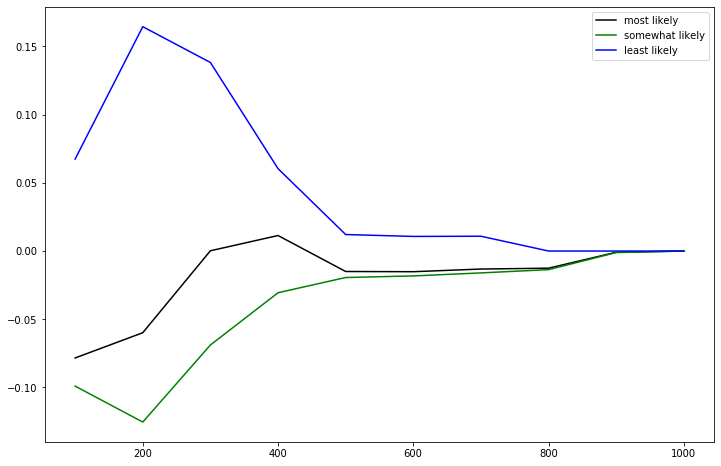

In [23]:
f, ax= plt.subplots(1, 1,  figsize=(12,8)) 
plt.plot(bins, cdf_600_03 - cdf_posterior, color='k', label='most likely')
plt.plot(bins, cdf_700_03 - cdf_posterior, color='g', label='somewhat likely')
plt.plot(bins, cdf_400_03 - cdf_posterior, color='b', label='least likely')

plt.legend()
plt.show()

In [24]:
print("Sum of residuals for 600, 0.3 =", np.sum(np.abs(cdf_600_03 - cdf_posterior)))
print("Sum of residuals for 700, 0.3 =", np.sum(np.abs(cdf_700_03 - cdf_posterior)))
print("Sum of residuals for 400, 0.3 =", np.sum(np.abs(cdf_400_03 - cdf_posterior)))

Sum of residuals for 600, 0.3 = 0.2066121386361434
Sum of residuals for 700, 0.3 = 0.3921858256225339
Sum of residuals for 400, 0.3 = 0.46408578087861535
